In [2]:
import phenoct
import os
from pathlib import Path
import time

In [3]:
# !pip install --upgrade git+https://github.com/aus-plant-phenomics-facility/phenoct.git@v1.1.4

## To process one sample

### STEP1 - segmentation

In [4]:
# Import sample
tube = phenoct.Tube(r"data/XRAYCT_V_X-020150-01_240909170158498_ears_1_200mm_084mu_0773-OBF-2-SH0004_240909185154927.rek")

uint16


In [5]:
# Run segmentation to remove tube and attenuation values below the set threshold
# start_slice - first slice to segment from top
# stop_slice - last slice to segment from top
# tube_r - tube radius, between 160-180
# tube_thickness - between 25-35
tube.segment_sample_holder(start_slice=750, stop_slice=2600, tube_r=170, tube_thickness=30, debug=False, attenuation_threshold = 2000)

Segmenting slice: 2599: 100%|██████████| 1850/1850 [00:11<00:00, 166.47it/s]


In [ ]:
# view in napari to check segmentation quality
import napari

# viewer = napari.view_image(tube.segmented_data) #to view segmented data in napari
viewer = napari.view_image(tube.segmented_data, contrast_limits=[0,15000]) #to view segmented data in napari with preset attenuation_value range

In [1]:
# save as tiff
# tube.write_segmented_data_tiff("E:\\Projects\\0692_MT\\tiff\\00710_32bit.tiff",compression=True)
tube.write_segmented_data_tiff(r"E:\Projects\0609 oz barley\2D photos\test\test.tiff", compression=True)

NameError: name 'tube' is not defined

### STEP2 - maximum projection

In [ ]:
# save as 16-bit image

# to process one file for max
import numpy as np
from tifffile import imread, imwrite
import cv2

# Read the 3D binary volume image
three_d_seg_bw = imread(r"E:\Projects\0609 oz barley\2D photos\test\test.tiff")

# Front view (max projection along the 3rd axis)
view1 = np.max(three_d_seg_bw, axis=2)
# imwrite('max_proj_view1.tiff', view1, compression=None)
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_1.tiff", view1, compression=None)


# Side view (max projection along the 2nd axis)
view2 = np.max(three_d_seg_bw, axis=1)
# imwrite('max_proj_view2.tiff', view2, compression=None)
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_2.tiff", view2, compression=None)

# Top view (max projection along the 1st axis)
view3 = np.max(three_d_seg_bw, axis=0)
# imwrite('max_proj_view3.tiff', view3, compression=None)
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_3.tiff", view3, compression=None)


False

In [ ]:
# save as 8-bit image
import numpy as np
from tifffile import imread, imwrite

# Read the 3D binary volume image
three_d_seg_bw = imread(r"E:\Projects\0609 oz barley\2D photos\test\test.tiff")

# Front view (max projection along the 3rd axis)
view1 = np.max(three_d_seg_bw, axis=2)
# Normalize the pixel values to the 0-255 range for 8-bit
view1_normalized = (view1 / view1.max()) * 255
view1_8bit = view1_normalized.astype(np.uint8)
# Save the 8-bit image
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_1.tiff", view1_8bit, compression=None)


# Side view (max projection along the 2nd axis)
view2 = np.max(three_d_seg_bw, axis=1)
view2_normalized = (view2 / view1.max()) * 255
view2_8bit = view2_normalized.astype(np.uint8)
# imwrite('max_proj_view2.tiff', view2, compression=None)
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_2.tiff", view2_8bit, compression=None)

# Top view (max projection along the 1st axis)
view3 = np.max(three_d_seg_bw, axis=0)
view3_normalized = (view3 / view1.max()) * 255
view3_8bit = view3_normalized.astype(np.uint8)
# imwrite('max_proj_view3.tiff', view3, compression=None)
imwrite(r"E:\Projects\0609 oz barley\2D photos\test\2D_3.tiff", view3_8bit, compression=None)

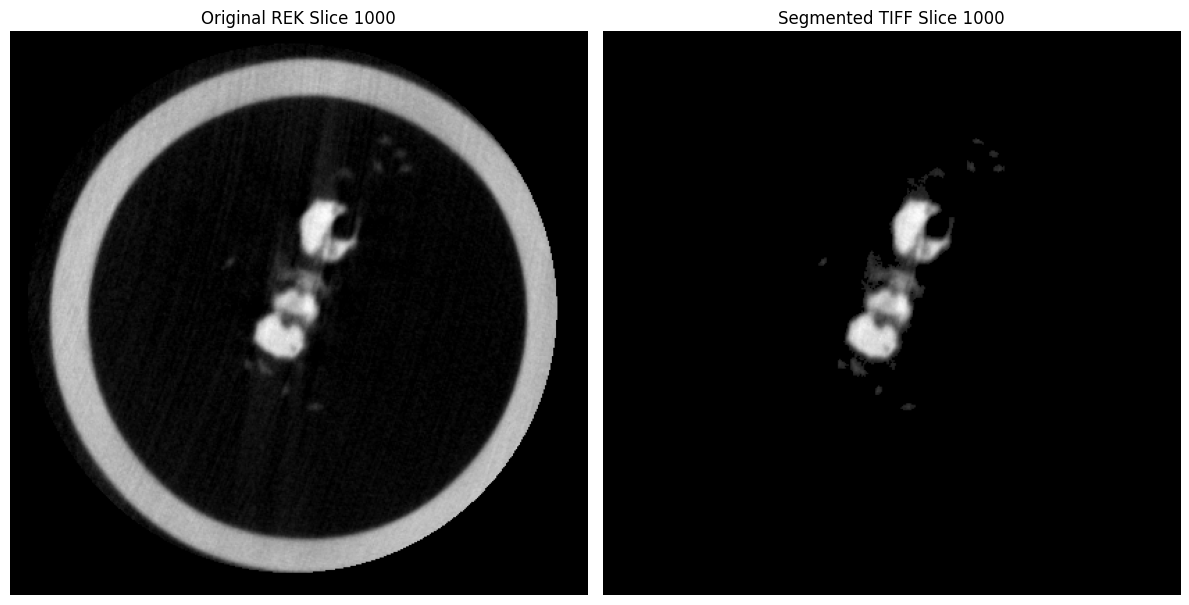

In [7]:
from matplotlib import pyplot as plt
import tifffile

slice_index = 1000
stack = tifffile.imread("data/020150.tiff")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 原始 .rek 数据（Tube 中的 raw data）
axs[0].imshow(tube.data[slice_index], cmap='gray')
axs[0].set_title(f"Original REK Slice {slice_index}")
axs[0].axis('off')

# 分割后的 tiff 数据
axs[1].imshow(stack[slice_index], cmap='gray')
axs[1].set_title(f"Segmented TIFF Slice {slice_index}")
axs[1].axis('off')

plt.tight_layout()
plt.show()